## Exploring all Regression types 

### 1. Read the data into numpy array

In [263]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [264]:
data = pd.read_csv('data.csv')

### 2. Plot and Explore the data to get a better understanding

In [265]:
data.head()

,2,1
51.87,79.72,1249.99
-30.66,-15.64,-516.61
-57.57,94.22,312.09
-122.10,5.15,-1544.90
-53.45,41.87,-201.57


In [266]:
data.reset_index(level=0, inplace=True)

In [267]:
data.columns = ['feature_1', 'feature_2','target']

In [268]:
data.head()

,feature_1,feature_2,target
0,51.87,79.72,1249.99
1,-30.66,-15.64,-516.61
2,-57.57,94.22,312.09
3,-122.10,5.15,-1544.90
4,-53.45,41.87,-201.57


In [269]:
data.describe()

,feature_1,feature_2,target
count,3000.000000,3000.00000,3000.000000
mean,-18.483293,31.24422,-11.450140
std,34.398479,42.99015,662.873355
min,-140.710000,-132.18000,-2325.790000
25%,-40.392500,3.38250,-446.140000
50%,-18.485000,31.34500,-17.680000
75%,4.125000,60.59000,429.782500
max,93.930000,189.99000,2198.490000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B93AAC37F0>,
      dtype=object)

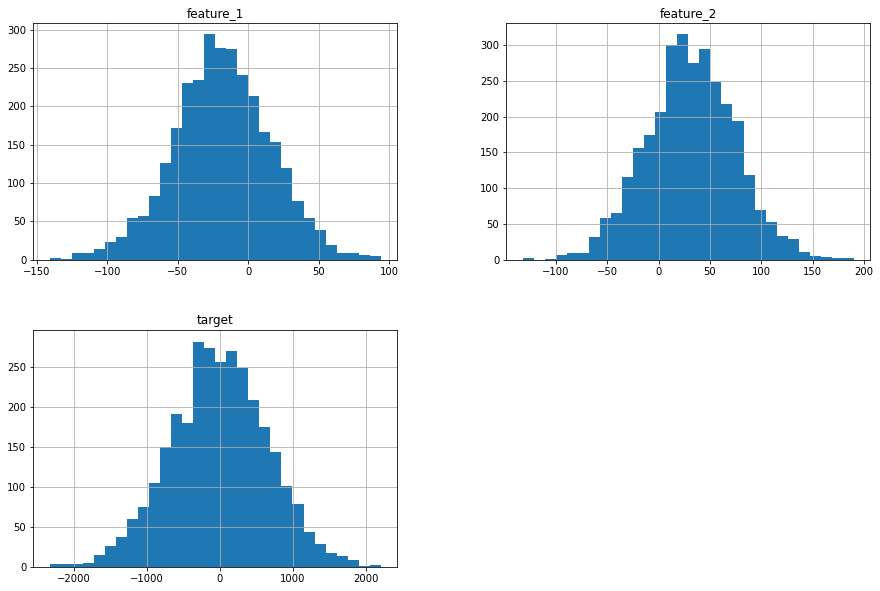

In [270]:
data.hist(bins=30, figsize=(15, 10))

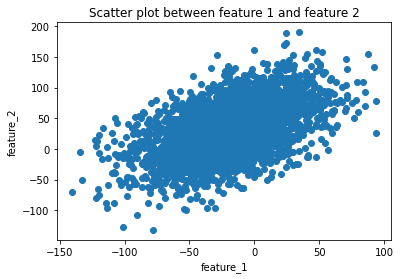

In [271]:
plt.scatter(data['feature_1'],data['feature_2'])
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('Scatter plot between feature 1 and feature 2')
plt.show()

### 3. Prepare the data for modelling. (8 points)

In [272]:
# Separate the data: input and output.
X= data[['feature_1', 'feature_2']]
y = data['target']

In [273]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this. 
# From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?
#### As we dont have the domain information and meta data about the given dataset, we cannt perform  stratified sampling

### 4. Modelling

#### 4.1. Linear Regression (8 points)

In [274]:
# Implement Linear Regression.
# Use both train and val data for training purpose.
# Make preditions on both training(train+val) and test data.
X_final_training = pd.concat([X_train,X_val],ignore_index=True)
y_final_training = pd.concat([y_train,y_val],ignore_index=True)

In [275]:
model_lr = LinearRegression()
model_lr.fit(X_final_training, y_final_training)

LinearRegression()

In [276]:
y_test_pred = model_lr.predict(X_test)

In [277]:
mse = mean_squared_error(y_test, y_test_pred)

rmse = math.sqrt(mse)

print(f'RMSE on Test data: {rmse}')

RMSE on Test data: 148.47388000962516


In [278]:
y_train_pred = model_lr.predict(X_final_training)

In [279]:
mse = mean_squared_error(y_final_training, y_train_pred)

rmse = math.sqrt(mse)

print(f'RMSE on Train data: {rmse}')

RMSE on Train data: 151.58756422068186


#### 4.2. Ridge Regression (8 points)

In [280]:
# Implement Ridge Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

In [281]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_final_training, y_final_training)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [282]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002992,0.000631,0.001596,0.000489,0.0001,{'alpha': 0.0001},-117.680063,-124.558721,-119.44424,-119.474173,...,-120.902416,2.605106,1,-121.585538,-119.901817,-121.092636,-121.095426,-120.12817,-120.760718,0.638805
1,0.003804,0.003607,0.000203,0.000406,0.001,{'alpha': 0.001},-117.680063,-124.558721,-119.44424,-119.474173,...,-120.902416,2.605106,2,-121.585538,-119.901817,-121.092636,-121.095426,-120.12817,-120.760718,0.638805
2,0.003206,0.003927,0.001594,0.003188,0.01,{'alpha': 0.01},-117.680063,-124.558722,-119.44424,-119.474173,...,-120.902417,2.605106,3,-121.585538,-119.901817,-121.092637,-121.095427,-120.12817,-120.760718,0.638805
3,0.001600,0.003200,0.001594,0.003188,0.05,{'alpha': 0.05},-117.680064,-124.558722,-119.44424,-119.474173,...,-120.902417,2.605106,4,-121.585538,-119.901817,-121.092637,-121.095427,-120.12817,-120.760718,0.638805
4,0.000000,0.000000,0.001600,0.003200,0.1,{'alpha': 0.1},-117.680064,-124.558723,-119.44424,-119.474172,...,-120.902417,2.605107,5,-121.585539,-119.901817,-121.092637,-121.095427,-120.12817,-120.760718,0.638805


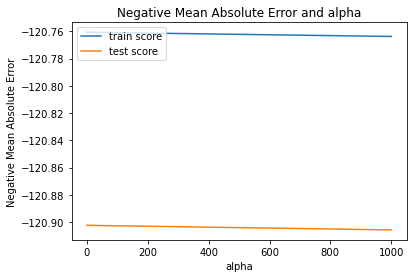

In [283]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [284]:
model_cv.best_params_

{'alpha': 0.0001}

In [285]:
model_ridge = Ridge(alpha = 0.0001) 
model_ridge.fit(X_final_training, y_final_training)

Ridge(alpha=0.0001)

In [286]:
y_test_pred = model_ridge.predict(X_test)

In [287]:
mse = mean_squared_error(y_test, y_test_pred)

rmse = math.sqrt(mse)

print(f'RMSE on Test data: {rmse}')

RMSE on Test data: 148.47388000982554


In [288]:
y_train_pred = model_ridge.predict(X_final_training)

In [289]:
mse = mean_squared_error(y_final_training, y_train_pred)

rmse = math.sqrt(mse)

print(f'RMSE on Train data: {rmse}')

RMSE on Train data: 151.58756422068186


#### 4.3. Lasso Regression (8 points)

In [290]:
# Implement Lasso Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
# import Lasso regression from sklearn library 

In [291]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_final_training, y_final_training)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [292]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003419,0.002662,0.002393,0.002941,0.0001,{'alpha': 0.0001},-117.680064,-124.558721,-119.444240,-119.474173,...,-120.902417,2.605106,4,-121.585538,-119.901817,-121.092637,-121.095426,-120.128170,-120.760718,0.638805
1,0.003194,0.003912,0.000000,0.000000,0.001,{'alpha': 0.001},-117.680065,-124.558721,-119.444240,-119.474176,...,-120.902417,2.605105,5,-121.585538,-119.901817,-121.092637,-121.095425,-120.128170,-120.760717,0.638804
2,0.003193,0.003911,0.001607,0.003214,0.01,{'alpha': 0.01},-117.680077,-124.558699,-119.444237,-119.474182,...,-120.902412,2.605092,2,-121.585539,-119.901821,-121.092637,-121.095425,-120.128168,-120.760718,0.638804
3,0.001600,0.003201,0.003206,0.003927,0.05,{'alpha': 0.05},-117.680164,-124.558654,-119.444229,-119.474206,...,-120.902412,2.605045,3,-121.585509,-119.901837,-121.092643,-121.095425,-120.128167,-120.760716,0.638793
4,0.001599,0.003198,0.000000,0.000000,0.1,{'alpha': 0.1},-117.680217,-124.558772,-119.444228,-119.474381,...,-120.902481,2.605046,7,-121.585535,-119.901858,-121.092667,-121.095352,-120.128191,-120.760721,0.638784


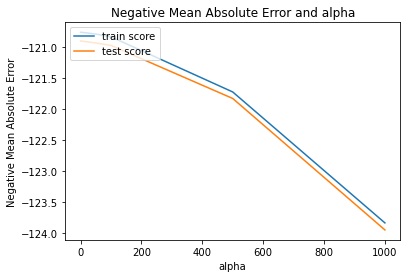

In [293]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [294]:
model_cv.best_params_

{'alpha': 0.2}

In [295]:
model_lasso = Lasso(alpha = 0.2) 
model_lasso.fit(X_final_training, y_final_training)

Lasso(alpha=0.2)

In [296]:
y_test_pred = model_lasso.predict(X_test)

In [297]:
mse = mean_squared_error(y_test, y_test_pred)

rmse = math.sqrt(mse)

print(f'RMSE on Test data: {rmse}')

RMSE on Test data: 148.47341942588696


In [298]:
y_train_pred = model_lasso.predict(X_final_training)

In [299]:
mse = mean_squared_error(y_final_training, y_train_pred)

rmse = math.sqrt(mse)

print(f'RMSE on Train data: {rmse}')

RMSE on Train data: 151.5875643588549


#### 4.4. ElasticNet Regression (8 points)

In [300]:
# Implement ElasticNet Regression.
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

In [301]:
parametersGrid = {"alpha": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20],
                  "l1_ratio": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20]}

eNet = ElasticNet()
grid = GridSearchCV(eNet, parametersGrid, scoring='neg_mean_absolute_error', return_train_score=True,
                        verbose = 1)
grid.fit(X_final_training, y_final_training)
#Y_pred = grid.predict(X_test)

Fitting 5 folds for each of 484 candidates, totalling 2420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2420 out of 2420 | elapsed:   11.1s finished


GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20],
                         'l1_ratio': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                      0.4, 0.5, 0.6, 0.9, 1.0, 2.0, 3.0, 4.0,
                                      5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [302]:
grid.best_params_

{'alpha': 1.0, 'l1_ratio': 10.0}

In [303]:
model_net = ElasticNet(alpha = 1,l1_ratio=10) 
model_net.fit(X_final_training, y_final_training)

ElasticNet(alpha=1, l1_ratio=10)

In [304]:
y_test_pred = model_net.predict(X_test)

In [305]:
mse = mean_squared_error(y_test, y_test_pred)

rmse = math.sqrt(mse)

print(f'RMSE on Test data: {rmse}')

RMSE on Test data: 148.4609112487195


In [306]:
y_train_pred = model_net.predict(X_final_training)

In [307]:
mse = mean_squared_error(y_final_training, y_train_pred)

rmse = math.sqrt(mse)

print(f'RMSE on Train data: {rmse}')

RMSE on Train data: 151.61982033973726


### 5. Analysis (8 points)

In [308]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.
y_test_pred_lr = model_lr.predict(X_test[:10])
y_test_pred_ridge = model_ridge.predict(X_test[:10])
y_test_pred_lasso = model_lasso.predict(X_test[:10])
y_test_pred_net = model_net.predict(X_test[:10])
pred_vs_actual = pd.DataFrame(list(zip(y_test[:10],y_test_pred_lr,y_test_pred_ridge,y_test_pred_lasso,y_test_pred_net)), 
               columns =['Actual', 'Prediction_from_LR','Prediction_from_Ridge','Prediction_from_Lasso','Prediction_from_Elastic Net'])
pred_vs_actual

,Actual,Prediction_from_LR,Prediction_from_Ridge,Prediction_from_Lasso,Prediction_from_Elastic Net
0,66.12,61.235630,61.235630,61.234646,61.326271
1,-572.89,-576.474002,-576.474002,-576.460818,-575.772932
2,-94.71,-112.489283,-112.489283,-112.486068,-112.146884
3,-306.84,-413.460170,-413.460170,-413.463833,-416.243135
4,580.10,602.521612,602.521612,602.531077,607.750004
5,-34.05,-19.808152,-19.808152,-19.812207,-20.865752
6,-81.37,-172.968197,-172.968197,-172.973264,-174.990230
7,552.60,601.278257,601.278257,601.281232,604.867643
8,-24.39,-42.406417,-42.406417,-42.395925,-39.908065
9,538.47,558.283905,558.283905,558.282180,560.491393


In [309]:
mse_test = []
mse_train = []
r2_score_test = []
r2_score_train = []
for model in [model_lr,model_ridge,model_lasso,model_net]:
    y_test_pred = model.predict(X_test)
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    r2_score_test.append(r2_score(y_test, y_test_pred))
    y_train_pred = model.predict(X_final_training)
    mse_train.append(mean_squared_error(y_final_training, y_train_pred))
    r2_score_train.append(r2_score(y_final_training, y_train_pred))

In [310]:
Metrics_df = pd.DataFrame(list(zip(mse_test,np.sqrt(mse_test),mse_train,np.sqrt(mse_train),r2_score_test,r2_score_train)),columns=['MSE_Test','RMSE_Test','MSE_Train','RMSE_Train','R2 Test','R2 Train'],index=['Linear Regression','Ridge Regression','Lasso Regression','Elastic Net Regression'])

In [311]:
Metrics_df

,MSE_Test,RMSE_Test,MSE_Train,RMSE_Train,R2 Test,R2 Train
Linear Regression,22044.493045,148.473880,22978.789626,151.587564,0.951394,0.947258
Ridge Regression,22044.493045,148.473880,22978.789626,151.587564,0.951394,0.947258
Lasso Regression,22044.356276,148.473419,22978.789668,151.587564,0.951394,0.947258
Elastic Net Regression,22040.642169,148.460911,22988.569920,151.619820,0.951402,0.947236


### 6. Final Observations (2 points)

# Write down your final conclusions/observations.

We can observe from the above metric table, all models performed with almost same error and Linear Regression with out 
any regularization was able to capture the maximum variance of the given data. So, We may not need to perform regularization for the given data as Linear regression is performing well.